<a href="https://colab.research.google.com/github/Afix0/BP/blob/main/Embeddings004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ucimlrepo


In [2]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

mushroom = fetch_ucirepo(id=73)
mushroom_df = pd.DataFrame(data=mushroom.data.features)
# mushroom_df.head()

def preprocess_mushroom_data(df):

    mapping = {
    'cap-shape': {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'},
    'cap-surface': {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},
    'cap-color': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'bruises': {'t': 'bruises', 'f': 'no bruises'},
    'odor': {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'},
    'gill-attachment': {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'},
    'gill-spacing': {'c': 'close', 'w': 'crowded', 'd': 'distant'},
    'gill-size': {'b': 'broad', 'n': 'narrow'},
    'gill-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-shape': {'e': 'enlarging', 't': 'tapering'},
    'stalk-root': {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted', '?': 'missing'},
    'stalk-surface-above-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-surface-below-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-color-above-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-color-below-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'veil-type': {'p': 'partial', 'u': 'universal'},
    'veil-color': {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'},
    'ring-number': {'n': 'none', 'o': 'one', 't': 'two'},
    'ring-type': {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'},
    'spore-print-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'},
    'population': {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'},
    'habitat': {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'}
}

    for column, mapping in mapping.items():
        df[column] = df[column].replace(mapping)

    return df

mushroom_df = preprocess_mushroom_data(mushroom_df).astype(str)

for column in mushroom_df.columns:
    split_columns = column.split("-")
    jointed_columns = ' '.join(split_columns)
    mushroom_df[column] = mushroom_df[column].apply(lambda x: f"{jointed_columns} is {x}")

mushroom_df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,cap shape is convex,cap surface is smooth,cap color is brown,bruises is bruises,odor is pungent,gill attachment is free,gill spacing is close,gill size is narrow,gill color is black,stalk shape is enlarging,...,stalk surface below ring is smooth,stalk color above ring is white,stalk color below ring is white,veil type is partial,veil color is white,ring number is one,ring type is pendant,spore print color is black,population is scattered,habitat is urban
1,cap shape is convex,cap surface is smooth,cap color is yellow,bruises is bruises,odor is almond,gill attachment is free,gill spacing is close,gill size is broad,gill color is black,stalk shape is enlarging,...,stalk surface below ring is smooth,stalk color above ring is white,stalk color below ring is white,veil type is partial,veil color is white,ring number is one,ring type is pendant,spore print color is brown,population is numerous,habitat is grasses
2,cap shape is bell,cap surface is smooth,cap color is white,bruises is bruises,odor is anise,gill attachment is free,gill spacing is close,gill size is broad,gill color is brown,stalk shape is enlarging,...,stalk surface below ring is smooth,stalk color above ring is white,stalk color below ring is white,veil type is partial,veil color is white,ring number is one,ring type is pendant,spore print color is brown,population is numerous,habitat is meadows
3,cap shape is convex,cap surface is scaly,cap color is white,bruises is bruises,odor is pungent,gill attachment is free,gill spacing is close,gill size is narrow,gill color is brown,stalk shape is enlarging,...,stalk surface below ring is smooth,stalk color above ring is white,stalk color below ring is white,veil type is partial,veil color is white,ring number is one,ring type is pendant,spore print color is black,population is scattered,habitat is urban
4,cap shape is convex,cap surface is smooth,cap color is gray,bruises is no bruises,odor is none,gill attachment is free,gill spacing is crowded,gill size is broad,gill color is black,stalk shape is tapering,...,stalk surface below ring is smooth,stalk color above ring is white,stalk color below ring is white,veil type is partial,veil color is white,ring number is one,ring type is evanescent,spore print color is brown,population is abundant,habitat is grasses


In [3]:
sentences = []
for i in range(len(mushroom_df)):
    sentence = []
    for word in mushroom_df.iloc[i]:
        sentence.append(word)
    sentences.append(sentence)

print(len(sentences))


8124


In [4]:
# VIZUALIZACE VET, POROVNANI MODELU
import numpy as np
import gensim
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import LabelEncoder



models = {
    "model_10": Word2Vec(sentences, min_count=1, vector_size=10, window=5),
    "model_20": Word2Vec(sentences, min_count=1, vector_size=20, window=5),
    "model_30": Word2Vec(sentences, min_count=1, vector_size=30, window=5),
    "model_40": Word2Vec(sentences, min_count=1, vector_size=40, window=5),
    "model_50": Word2Vec(sentences, min_count=1, vector_size=50, window=5)
}


def sentence_embedding(sentence, model):
    word_embeddings = []
    for word in sentence:
        word_embeddings.append(model.wv[word])
    return np.mean(word_embeddings, axis=0)


def plot_sentence_embeddings(sentences, model_name, cluster_labels=None, target_labels=None):
    plt.figure(figsize=(15, 10))
    model = models[model_name]
    embeddings = [sentence_embedding(sentence, model) for sentence in sentences]
    tsne = TSNE(n_components=2, random_state= 73, perplexity=300, learning_rate=200, max_iter=1000)
    embeddings_2d = tsne.fit_transform(np.array(embeddings))
    cmap = plt.colormaps['hsv']

    if cluster_labels is not None and target_labels is None:
        n_clusters = len(set(cluster_labels))
        cmap = cm.get_cmap('hsv', n_clusters)
        colors = cmap(np.linspace(0, 1, n_clusters))
        handles = [plt.Line2D([], [], color=color) for color in colors]
        labels = [f"Cluster {i}" for i in range(n_clusters)]
        scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=colors[cluster_labels])

        plt.legend(handles=handles, labels=labels, title="Clusters")

    elif target_labels is not None and cluster_labels is not None:
        n_clusters = len(set(cluster_labels))

        edible_color = 'green'
        poisonous_color = 'red'

        colors = [edible_color if label == 'edible' else poisonous_color for label in target_labels]

        scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=colors)
        handles = [plt.Line2D([], [], color=edible_color, label='Edible'), plt.Line2D([], [], color=poisonous_color, label='Poisonous')]

        labels = ['Edible', 'Poisonous']

        plt.legend(handles=handles, labels=labels, title="Classes")


    else:
        plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=range(len(sentences)), cmap=cmap)

    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.title(f"Sentence Embeddings Visualization by: {model_name}")
    plt.show()

# for model_name in models:
#     plot_sentence_embeddings(sentences, model_name)

**W2V models compared:**

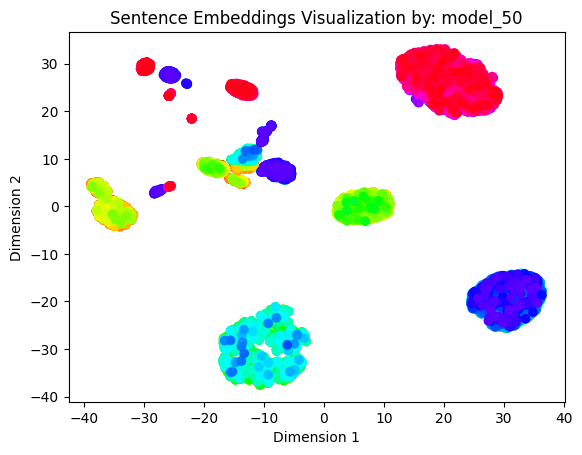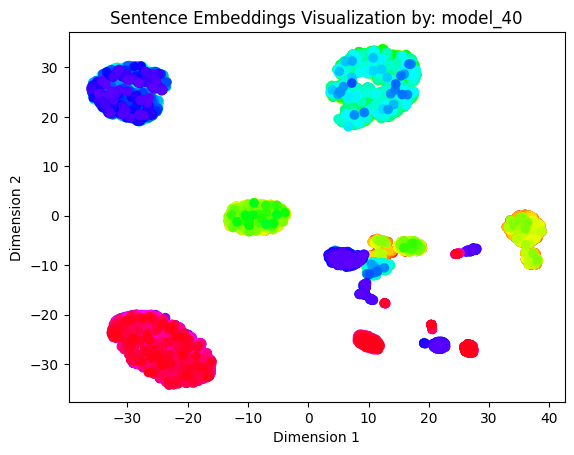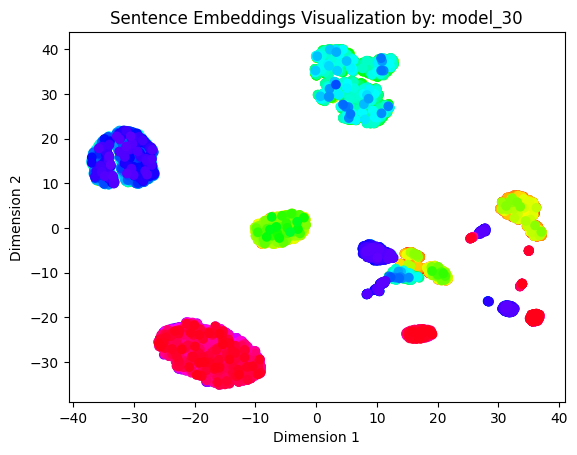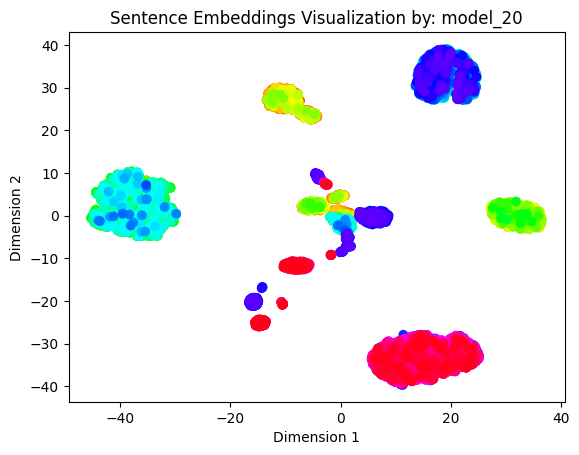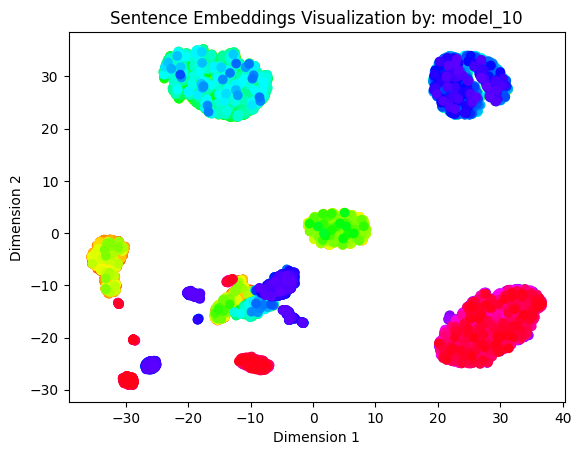

[[1.0000001  0.86602557 0.81717837 ... 0.4485297  0.2719974  0.38198182]
 [0.86602557 1.0000001  0.96808773 ... 0.39865696 0.03224256 0.35810974]
 [0.81717837 0.96808773 0.9999999  ... 0.55134135 0.12037241 0.5173587 ]
 ...
 [0.4485297  0.39865696 0.55134135 ... 1.         0.19663993 0.9878333 ]
 [0.2719974  0.03224256 0.12037241 ... 0.19663993 0.9999999  0.149547  ]
 [0.38198182 0.35810974 0.5173587  ... 0.9878333  0.149547   1.        ]]


<ipython-input-4-ba9dcda1cd81>:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hsv', n_clusters)


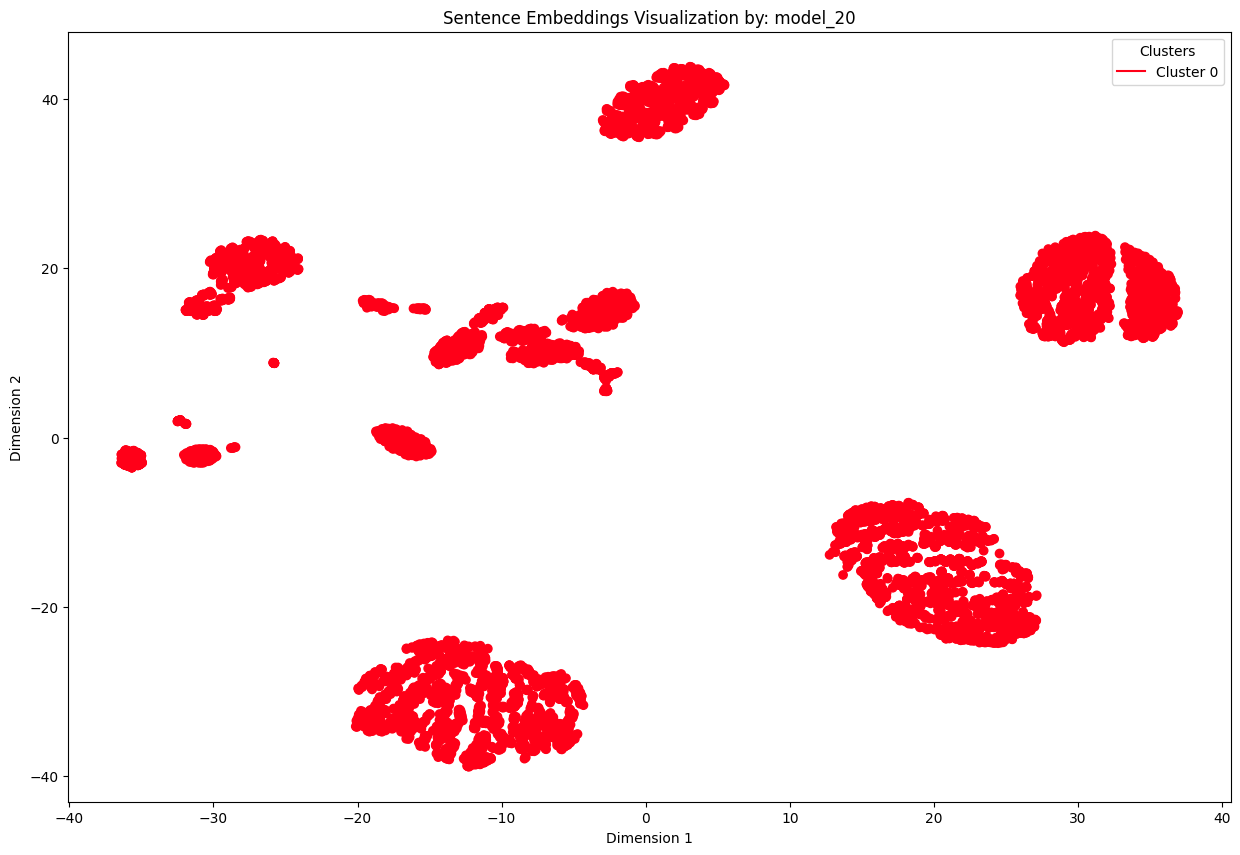

In [5]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import DBSCAN

model = models["model_20"]
embeddings = [sentence_embedding(sentence, model) for sentence in sentences]
similarity_matrix =np.abs(cosine_similarity(embeddings)) #otherwise the matrix is ​​not positive semi-definite
print(similarity_matrix)
clustering = DBSCAN(metric='precomputed').fit(similarity_matrix)
labels_cos = clustering.labels_

plot_sentence_embeddings(sentences, "model_20", labels_cos)

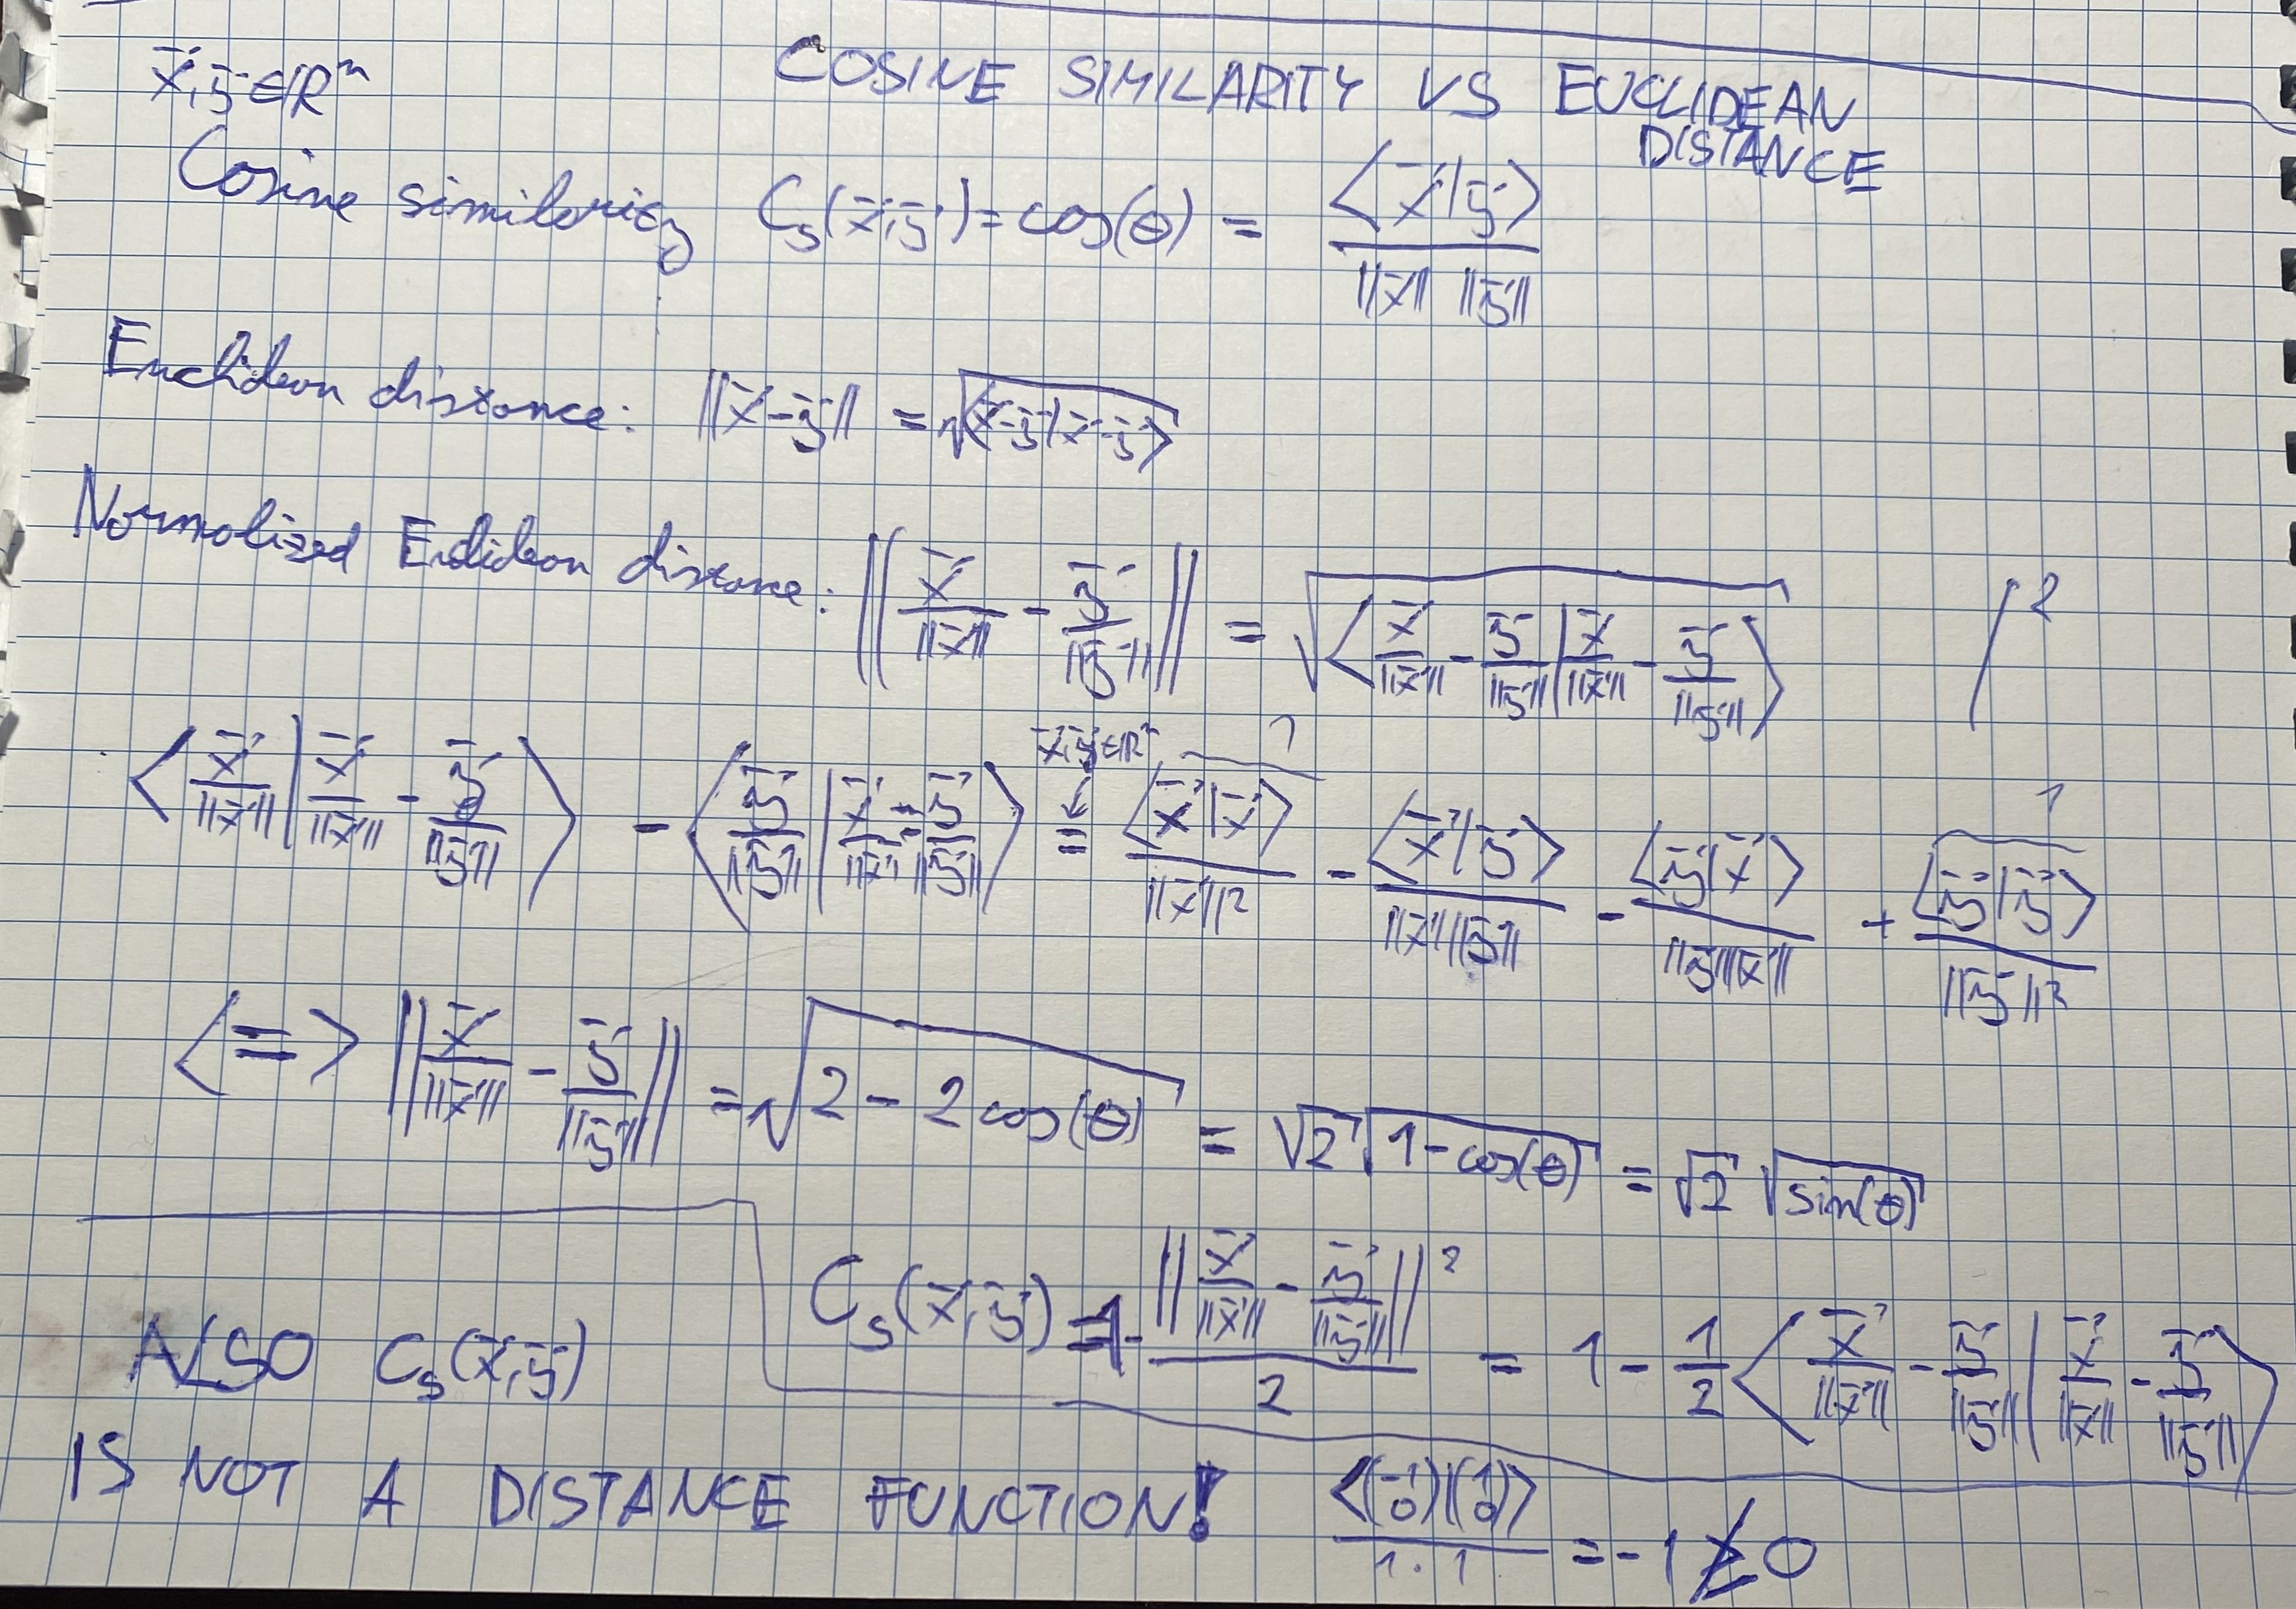

23


<ipython-input-4-ba9dcda1cd81>:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hsv', n_clusters)


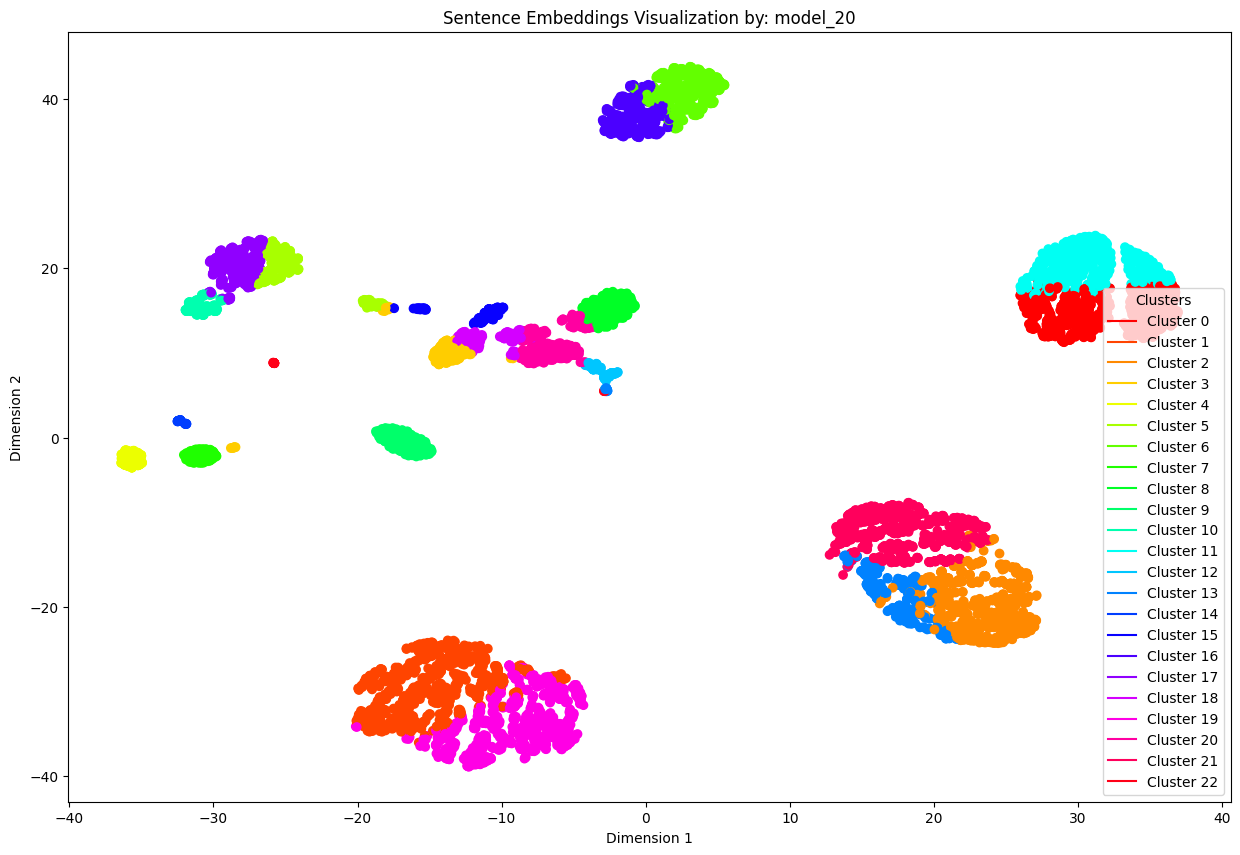

In [6]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder




model = models["model_20"]
embeddings = [sentence_embedding(sentence, model) for sentence in sentences]
embeddings_normalized = np.array([sentence_embedding(sentence, model)/np.linalg.norm(sentence_embedding(sentence, model)) for sentence in sentences])
kmeans = KMeans(n_clusters=23, random_state=0)
kmeans.fit(embeddings_normalized)
cluster_labels = kmeans.labels_
print(len(set(cluster_labels)))

plot_sentence_embeddings(sentences, "model_20", cluster_labels)

In [7]:
mapping_targets = {'p': 'poisonous', 'e': 'edible'}

targets_df = pd.DataFrame(data=mushroom.data.targets)
targets_df.columns = ['class']
targets_df['class'] = targets_df['class'].map(mapping_targets)
targets_df.head()

,class
0,poisonous
1,edible
2,edible
3,poisonous
4,edible


In [8]:
print(np.array(targets_df['class']))

['poisonous' 'edible' 'edible' ... 'edible' 'poisonous' 'edible']


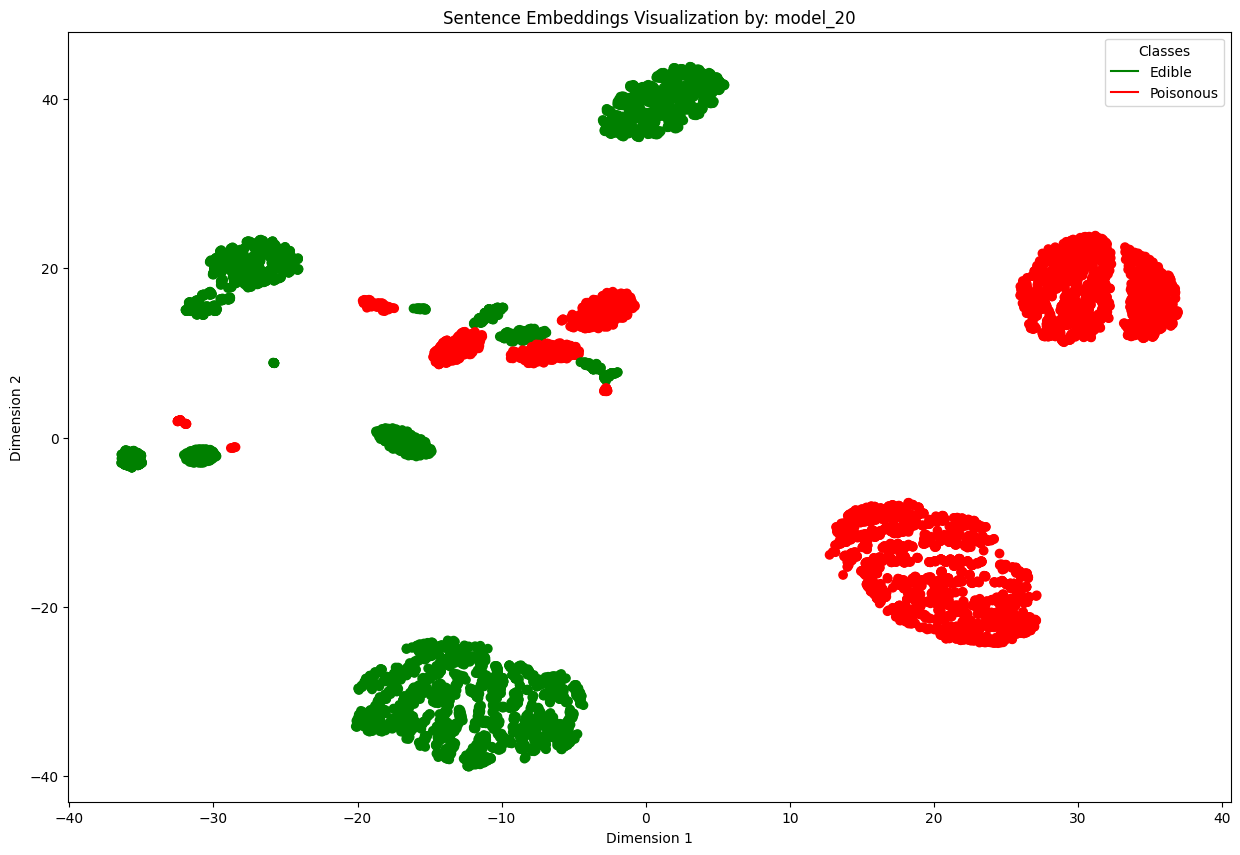

In [9]:
plot_sentence_embeddings(sentences, "model_20",cluster_labels=cluster_labels, target_labels=np.array(targets_df['class']))

In [89]:
from collections import Counter


cluster_counts = np.bincount(cluster_labels)
cluster_label_to_class = {}
for i, label in enumerate(cluster_labels):
    if label not in cluster_label_to_class:
        cluster_label_to_class[label] = targets_df['class'][i]
    else:
        if cluster_label_to_class[label] != targets_df['class'][i]:
            cluster_label_to_class[label] = 'mixed'

all_edible_indexes = [i for i, label in enumerate(cluster_labels) if cluster_label_to_class[label] == 'edible']
all_poisonous_indexes = [i for i, label in enumerate(cluster_labels) if cluster_label_to_class[label] == 'poisonous']

# print("All edible cluster data indexes:", all_edible_indexes)
# print("All poisonous cluster data indexes:", all_poisonous_indexes)

edible_cluster_indices = [cluster_label for cluster_label, class_label in cluster_label_to_class.items() if class_label == 'edible']
poisonous_cluster_indices = [cluster_label for cluster_label, class_label in cluster_label_to_class.items() if class_label == 'poisonous']

print("Indexes of clusters labeled as edible:", edible_cluster_indices)
print("Indexes of clusters labeled as poisonous:", poisonous_cluster_indices)

Indexes of clusters labeled as edible: [17, 16, 10, 6, 19, 1, 7, 4, 9]
Indexes of clusters labeled as poisonous: [3, 0, 11, 8, 21, 2, 13, 14]


In [87]:
mushroom_raw = pd.DataFrame(data=mushroom.data.features)
mushroom_raw = preprocess_mushroom_data(mushroom_raw)

In [88]:
from collections import Counter

cluster_indexes_dict = {label: [] for label in set(cluster_labels)}
for i, label in enumerate(cluster_labels):
    cluster_indexes_dict[label].append(i)

def most_common(list):
    data = Counter(list)
    return data.most_common(1)[0][0]

def compare_most_common_elements(dataset, cluster_indexes):

    for cluster_label, cluster_indices in cluster_indexes.items():
        cluster_data = dataset.loc[cluster_indices]
        most_common_elements = {}
        for col in cluster_data.columns:
            most_common_elements[col] = most_common(cluster_data[col])

        print(f"Most common elements in cluster {cluster_label}:")
        for col, most_common_val in most_common_elements.items():
            print(f"  {col}: {most_common_val}")



edible_cluster_indexes_dict = {key: cluster_indexes_dict[key] for key in edible_cluster_indices}
poisonous_cluster_indexes_dict = {key: cluster_indexes_dict[key] for key in poisonous_cluster_indices}
# print(edible_cluster_indexes_dict)
# print(poisonous_cluster_indexes_dict)

compare_most_common_elements(mushroom_raw, edible_cluster_indexes_dict)



Most common elements in cluster 17:
  cap-shape: bell
  cap-surface: scaly
  cap-color: yellow
  bruises: bruises
  odor: anise
  gill-attachment: free
  gill-spacing: close
  gill-size: broad
  gill-color: gray
  stalk-shape: enlarging
  stalk-root: club
  stalk-surface-above-ring: smooth
  stalk-surface-below-ring: smooth
  stalk-color-above-ring: white
  stalk-color-below-ring: white
  veil-type: partial
  veil-color: white
  ring-number: one
  ring-type: pendant
  spore-print-color: brown
  population: numerous
  habitat: meadows
Most common elements in cluster 16:
  cap-shape: flat
  cap-surface: smooth
  cap-color: brown
  bruises: no bruises
  odor: none
  gill-attachment: free
  gill-spacing: crowded
  gill-size: broad
  gill-color: brown
  stalk-shape: tapering
  stalk-root: equal
  stalk-surface-above-ring: smooth
  stalk-surface-below-ring: smooth
  stalk-color-above-ring: white
  stalk-color-below-ring: white
  veil-type: partial
  veil-color: white
  ring-number: one
  rin